In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
from sklearn import tree

In [8]:

df = pd.read_csv('D9data3.csv')
df.head()
df.shape







(400, 3)

In [9]:
## Split the data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),df.Purchased,test_size=0.2,random_state=0)

In [10]:
## Data preprocessing 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [11]:
## Model 
from sklearn.tree import DecisionTreeClassifier
mod = DecisionTreeClassifier(criterion = 'entropy',random_state=0).fit(x_train,y_train)
mod.predict(sc.fit_transform([[26,43000]]))
mod.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

C:\Users\Asus\AppData\Local\Temp\ipykernel_2760\2038909596.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


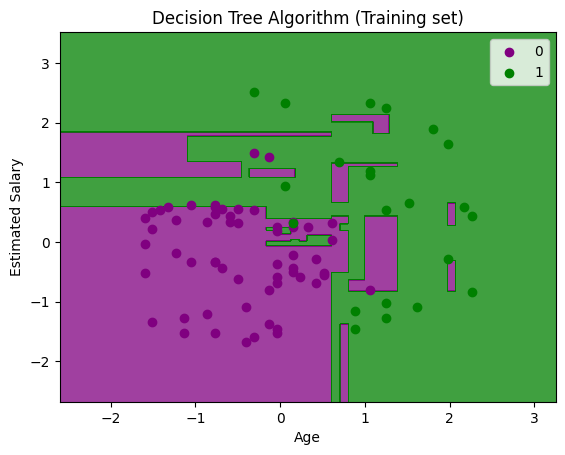

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object') instead.

<Figure size 3000x2000 with 0 Axes>

In [14]:
#Visulaizing the trianing set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, mod.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
plt.title('Decision Tree Algorithm (Training set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()
from sklearn import tree
plt.figure(figsize=(30,20))
_ = tree.plot_tree(mod,
                  feature_names = df.columns,
                  class_names = 'Purchased',
                  filled = True)